In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Merge the two datas to create one dataframe

In [3]:
zd=pd.read_csv('zomato.csv',encoding='latin1')
cc=pd.read_csv('Country-Code.csv')

In [4]:
df=zd.merge(cc, how='left')
df.shape

(9551, 22)

In [5]:
# Droping colums not required

In [6]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
7410,18492103,New Sindhi Chicken Corner,1,New Delhi,"4/192, Corner Shop 1, Subhash Nagar, New Delhi",Subhash Nagar,"Subhash Nagar, New Delhi",77.114538,28.636983,"North Indian, Mughlai",...,No,No,No,No,2,0.0,White,Not rated,0,India
5323,308831,New Madras Cafe,1,New Delhi,"Shop 15, DDA Market, Pocket C, Mayur Vihar Pha...",Mayur Vihar Phase 2,"Mayur Vihar Phase 2, New Delhi",77.305033,28.618933,South Indian,...,No,No,No,No,1,2.8,Orange,Average,11,India
3526,309013,Caboose X Cafe & Lounge,1,New Delhi,"18/31, 1st Floor, Main Market, East Patel Naga...",East Patel Nagar,"East Patel Nagar, New Delhi",77.172685,28.645259,"Fast Food, Cafe",...,No,No,No,No,2,3.2,Orange,Average,39,India
7214,18438448,Food Care,1,New Delhi,"WA-86, Main Road, Shakarpur, New Delhi",Shakarpur,"Shakarpur, New Delhi",77.279126,28.626912,"Chinese, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
3007,3506,Indian Coffee House,1,New Delhi,"2nd Floor, Mohan Singh Place, Connaught Place,...",Connaught Place,"Connaught Place, New Delhi",77.216040,28.630540,Fast Food,...,No,No,No,No,1,3.3,Orange,Average,1300,India


In [7]:
df=df.drop(['Country Code','Locality','Switch to order menu','Rating color', 'Address'],axis=1)

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Locality Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [9]:
df.shape

(9551, 17)

In [10]:
# droping duplicate values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9551, 17)

In [13]:
# checking th null values 

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [15]:
df.describe(include='all')

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
count,9.551000e+03,9551,9551,9551,9551.000000,9551.000000,9542,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551.000000,9551
unique,NaN,7446,141,1265,NaN,NaN,1825,NaN,12,2,2,2,NaN,NaN,6,NaN,15
top,NaN,Cafe Coffee Day,New Delhi,"Connaught Place, New Delhi",NaN,NaN,North Indian,NaN,Indian Rupees(Rs.),No,No,No,NaN,NaN,Average,NaN,India
freq,NaN,83,5473,122,NaN,NaN,936,NaN,8652,8393,7100,9517,NaN,NaN,3737,NaN,8652
mean,9.051128e+06,NaN,NaN,NaN,64.126574,25.854381,NaN,1199.210763,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,156.909748,NaN
std,8.791521e+06,NaN,NaN,NaN,41.467058,11.007935,NaN,16121.183073,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,430.169145,NaN
min,5.300000e+01,NaN,NaN,NaN,-157.948486,-41.330428,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN
25%,3.019625e+05,NaN,NaN,NaN,77.081343,28.478713,NaN,250.000000,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,5.000000,NaN
50%,6.004089e+06,NaN,NaN,NaN,77.191964,28.570469,NaN,400.000000,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,31.000000,NaN
75%,1.835229e+07,NaN,NaN,NaN,77.282006,28.642758,NaN,700.000000,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,131.000000,NaN


In [16]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [17]:
df.sample(20)

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
1816,18312606,Milan Apna Dhaba,Gurgaon,"Sector 22, Gurgaon",77.068948,28.503552,North Indian,300,Indian Rupees(Rs.),No,No,No,1,0.0,Not rated,0,India
2460,3100159,Crave Desserts & Bakes,Mangalore,"Balmatta, Mangalore",74.853622,12.873697,"Desserts, Bakery",200,Indian Rupees(Rs.),No,No,No,1,3.9,Good,196,India
5910,212,Domino's Pizza,New Delhi,"New Friends Colony, New Delhi",77.268846,28.561357,"Pizza, Fast Food",700,Indian Rupees(Rs.),No,No,No,2,2.8,Average,95,India
8813,18249124,B Tamang Chineese,Noida,"Sector 56, Noida",77.342829,28.603302,Chinese,300,Indian Rupees(Rs.),No,No,No,1,2.9,Average,4,India
4606,18238241,Nazeer Foods,New Delhi,"Karol Bagh, New Delhi",77.194120,28.652187,"Mughlai, North Indian",600,Indian Rupees(Rs.),No,Yes,No,2,3.5,Good,27,India
2795,3465,Southy,New Delhi,"Bhikaji Cama Place, New Delhi",77.188441,28.568237,South Indian,400,Indian Rupees(Rs.),No,Yes,No,1,2.4,Poor,33,India
4768,301203,Shree Rathnam,New Delhi,"Krishna Nagar, New Delhi",77.281416,28.660239,"South Indian, North Indian, Chinese",800,Indian Rupees(Rs.),No,Yes,No,2,2.9,Average,66,India
6666,18163908,Boombox Cafe Reloaded,New Delhi,"Rajouri Garden, New Delhi",77.118107,28.647193,"North Indian, Mexican, Chinese, Italian",1100,Indian Rupees(Rs.),Yes,No,No,3,3.9,Good,605,India
8162,8351,Paatra - Jaypee Greens,Noida,"Jaypee Greens Golf & Spa Resort, Surajpur, Noida",77.518139,28.469702,North Indian,3500,Indian Rupees(Rs.),Yes,No,No,4,3.5,Good,79,India
1260,4992,Knight Rider,Gurgaon,"DLF Cyber City, Gurgaon",77.093341,28.487788,"North Indian, Continental",1200,Indian Rupees(Rs.),Yes,No,No,3,3.1,Average,185,India


In [18]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

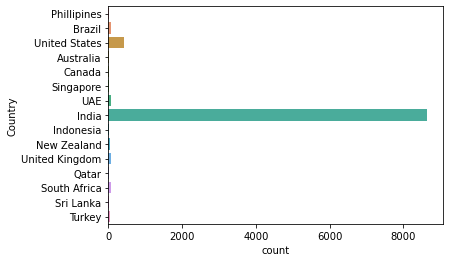

In [19]:
# which country has the highest number of restaurants
sns.countplot(y='Country', data=df);

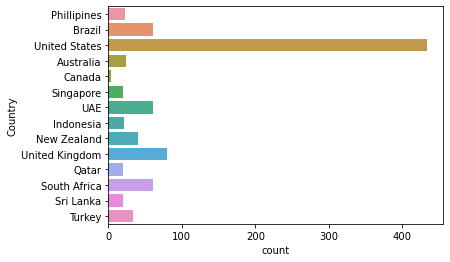

In [20]:
# Country with the 

noind=df.loc[df['Country'] != 'India'] 
sns.countplot(y='Country', data=noind);

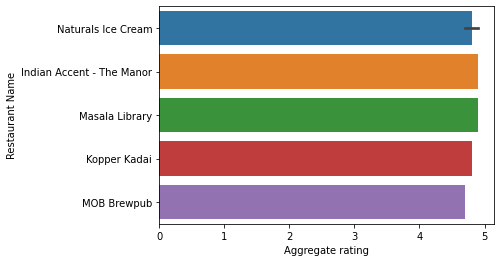

In [21]:
# indias top 5 best restaurants in delhi by rating

indel=df.loc[df['City'] == 'New Delhi']
top5=(indel.sort_values(by=['Aggregate rating'],ascending=False)).iloc[:6]
sns.barplot(y='Restaurant Name', x='Aggregate rating', data=top5)
plt.show()

In [32]:
indel=df.loc[df['City'] == 'New Delhi']
top5=(indel.sort_values(by=['Average Cost for two'],ascending=False))
# sns.barplot(y='Restaurant Name', x='Aggregate rating', data=top5)
# plt.show()
top5.head(10)

,Restaurant ID,Restaurant Name,City,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
7543,2701,Orient Express - Taj Palace Hotel,New Delhi,"The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),Yes,No,No,4,4.0,Very Good,145,India
4088,309548,Tian - Asian Cuisine Studio - ITC Maurya,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,No,4,4.1,Very Good,188,India
4087,2742,Bukhara - ITC Maurya,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,No,4,4.4,Very Good,2826,India
7499,2725,The Spice Route - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi",77.218187,28.625445,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",6000,Indian Rupees(Rs.),Yes,No,No,4,4.0,Very Good,259,India
7492,301523,Nostalgia at 1911 Brasserie - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),Yes,No,No,4,3.2,Average,12,India
7494,2724,1911 - The Imperial,New Delhi,"The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),Yes,No,No,4,3.9,Good,272,India
7538,2694,Wasabi by Morimoto - The Taj Mahal Hotel,New Delhi,"The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224304,28.605253,"Japanese, Sushi",6000,Indian Rupees(Rs.),Yes,No,No,4,3.9,Good,183,India
7539,2689,House of Ming - The Taj Mahal Hotel,New Delhi,"The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224618,28.605149,Chinese,5500,Indian Rupees(Rs.),Yes,No,No,4,4.0,Very Good,398,India
7522,6812,MEGU - The Leela Palace,New Delhi,"The Leela Palace, Chanakyapuri, New Delhi",77.188965,28.579401,"Japanese, Sushi",5500,Indian Rupees(Rs.),Yes,No,No,4,3.9,Good,178,India
7512,3910,24/7 Restaurant - The Lalit New Delhi,New Delhi,"The Lalit New Delhi, Barakhamba Road, New Delhi",77.227569,28.631486,"Continental, North Indian, Italian, Asian",5100,Indian Rupees(Rs.),Yes,No,No,4,3.7,Good,419,India


In [24]:
df.value_counts('City')

City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Length: 141, dtype: int64

In [ ]:
df.value_counts('Rating text')

In [ ]:
df.value_counts('Has Table booking').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Table booking')
plt.show()

In [ ]:
df.value_counts('Has Online delivery').plot(kind='pie', autopct='%1.2f%%');
plt.title('How many Restaurants have Online Delivery')
plt.show()

In [ ]:
sns.countplot(x='Price range',data=df)